My goal is to create a clustering a model that can recognize when soccer players play at the same position or similar positions. For example, recognize that Diego Alves from Flamengo and Cássio from Corinthians perform the same function at the field, both are goalkeepers.

With this project there is another jupyter notebook called `heatmap.ipynb` where the visualization part is made, basically, there I am building, and explaining better, `plotHeatmap`.

In [1]:
import pandas as pd
from plot import plotHeatmap # function created in heatmap.ipynb on this same directory
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

On this project I am going to use 3 teams: Corinthians, Flamengo and São Paulo.

Each row from the dataframe describes a touch on ball given by a player on a specific match.

| Column | Description |
| --- | --- |
| X | Location on x axis where the touch was given |
| Y | Location on y axis where the touch was given |
| player | The player who made the touch |
| match | The match in which the player made the touch |

Each repeated row means another touch on the same position.

The 3 dataframes are referents to matches from Campeonato Brasileiro 2020.

In [2]:
cor = pd.read_csv('data/corinthians-heatmap-data.csv')
fla = pd.read_csv('data/flamengo-heatmap-data.csv')
sao = pd.read_csv('data/saopaulo-heatmap-data.csv')

cor.head()

,match,player,X,Y
0,Corinthians x Atlético GO,Cássio,3,53
1,Corinthians x Atlético GO,Cássio,11,63
2,Corinthians x Atlético GO,Cássio,13,19
3,Corinthians x Atlético GO,Cássio,4,50
4,Corinthians x Atlético GO,Cássio,4,50


In [3]:
# Specifying the team for each player, this because we have like two D. Alves, each from different teams
cor['team'] = 'Corinthians'
fla['team'] = 'Flamengo'
sao['team'] = 'São Paulo'

# Concatenating the 3 dataframes
teams = pd.concat([cor, fla, sao], axis=0)
teams.reset_index(drop=True, inplace=True)
teams.tail()

,match,player,X,Y,team
88687,São Paulo x Flamengo,Pablo,42,88,São Paulo
88688,São Paulo x Flamengo,Pablo,40,93,São Paulo
88689,São Paulo x Flamengo,Pablo,60,6,São Paulo
88690,São Paulo x Flamengo,Pablo,98,15,São Paulo
88691,São Paulo x Flamengo,Pablo,63,11,São Paulo


The visual representation that I am going to use here was made in `heatmap.ipynb`. But basically, the adversary goal is in the right side of the graph and the left side of the field is the upper side of the graph.

So, below, we see a defender that plays more at right.

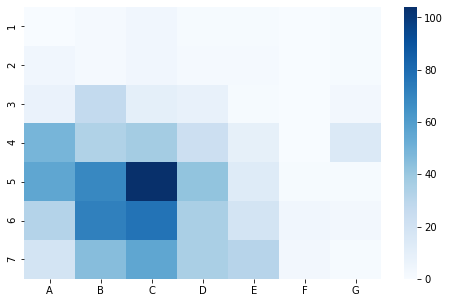

In [4]:
plotHeatmap(cor[cor['player'] == 'B. Méndez'], 7, show_labels=True)

Next we have a function that makes the registry for where was each touch, similar to what is done in `plotHeatmap`, and returns it in a dataframe informing the frequency of touches for each player in each match.

`areas_by_axis` specifies how many areas are going to have on the sides for each axis, so if `areas_by_axis` is 6, than we have $6\times6=36$ areas on the entire field.

`normalize` speaks for itself, it normalizes the touches by the players making the sum of a row's cells being 1.

In [5]:
def getAreasDataframe(data, areas_by_axis=6, normalize=False):
    def findYArea():
        left = i*areas_size
        right = (i+1)*areas_size
        
        for j in range(areas_by_axis):
            down = j*areas_size
            up = (j+1)*areas_size
            
            if left <= x and x <= right   and   down <= y and y <= up:
                heatmap_data.at[index, chr(letter_code)+str(areas_by_axis-j)] += 1
                return True
        return False
    
    players = data[['match', 'player', 'team']].copy()
    
    columns = [chr(65+i) + str(j+1) for i in range(areas_by_axis) for j in range(areas_by_axis)]
    index = [i for i in range(data.shape[0])]
    areas = pd.DataFrame(index=index, columns=columns).fillna(0)
    
    heatmap_data = pd.concat([players, areas], axis=1)
    
    for index, row in data.iterrows():
        x, y = row['X'], row['Y']

        areas_size = 100/areas_by_axis
        letter_code = 64
        
        for i in range(areas_by_axis): # for each are in x axis
            letter_code += 1
            if findYArea():
                break
                
    heatmap_data = heatmap_data.groupby(['match', 'player', 'team'], as_index=False).sum()
    
    if normalize:
        columns = heatmap_data.select_dtypes(exclude='object').columns
        heatmap_data[columns] = (heatmap_data[columns].transpose() / heatmap_data[columns].sum(axis=1)).transpose()
    
    return heatmap_data

In [6]:
# Divinding the touches in 49 areas on the field and normalizing it
data = getAreasDataframe(teams, areas_by_axis=7, normalize=True)
data[data.columns].head()

,match,player,team,A1,A2,A3,A4,A5,A6,A7,...,F5,F6,F7,G1,G2,G3,G4,G5,G6,G7
0,Athletico-PR x Corinthians,B. Méndez,Corinthians,0.000000,0.000000,0.016393,0.098361,0.032787,0.000000,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
1,Athletico-PR x Corinthians,Fagner,Corinthians,0.000000,0.000000,0.000000,0.000000,0.096386,0.024096,0.048193,...,0.0,0.00000,0.024096,0.0,0.0,0.00000,0.012048,0.012048,0.012048,0.108434
2,Athletico-PR x Corinthians,Gil,Corinthians,0.017544,0.052632,0.105263,0.035088,0.000000,0.000000,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.000000
3,Athletico-PR x Corinthians,Jô,Corinthians,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,...,0.0,0.00000,0.000000,0.0,0.0,0.00000,0.031250,0.000000,0.000000,0.000000
4,Athletico-PR x Corinthians,L. Natel,Corinthians,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.04878,0.073171,0.0,0.0,0.02439,0.000000,0.024390,0.073171,0.048780


Interpretating a little bit the result, L. Natel (row 4), during Athletico-PR x Corinthians didn't gave a single touch on ball being at A's areas. Looking at Jô, during the same match, 6.25% of all his touches was in A5 area.

With the data on this format I can already apply clustering to identify positions and group similar players.

In [7]:
areas_columns = data.columns[3:]

# 20 clusters
km = KMeans(n_clusters=20, random_state=0)

km.fit(data[areas_columns])

data['cluster'] = km.predict(data[areas_columns])

In [8]:
data[['match', 'player', 'cluster']].head()

,match,player,cluster
0,Athletico-PR x Corinthians,B. Méndez,18
1,Athletico-PR x Corinthians,Fagner,2
2,Athletico-PR x Corinthians,Gil,17
3,Athletico-PR x Corinthians,Jô,4
4,Athletico-PR x Corinthians,L. Natel,11


We see that Fagner, in Athletico-PR x Corinthians, belongs to cluster 2, but we don't know yet what each cluster means. To solve this I can use `km.cluster_centers_` to get how each cluster is. Below I define a function to visualize clusters.

In [9]:
def plotCluster(cluster):
    n_areas = 7

    a1 = km.cluster_centers_[cluster,:]

    c2 = np.empty((n_areas, n_areas))
    
    for i in range(n_areas):
        c2[:,i] = a1[i*n_areas:(i+1)*n_areas]
    
    plt.figure(figsize=(1.6*5, 5))
    
    xlabels = [chr(65+i) for i in range(n_areas)]
    ylabels = [i+1 for i in range(n_areas)]
    sns.heatmap(c2, cmap='Blues', xticklabels=xlabels, yticklabels=ylabels);

Below is how cluster 2 looks like, so if a player has a heatmap more similar to this than to other cluster, he is going to be classified as from cluster 2.

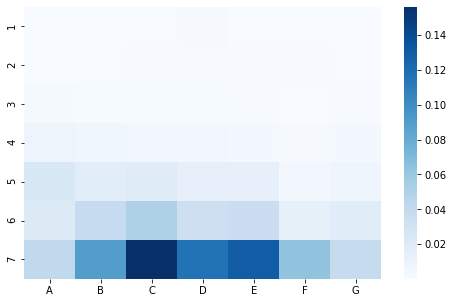

In [10]:
plotCluster(2)

If we plot Fagner's heatmap we see that he really has a behavior near to cluster 2.

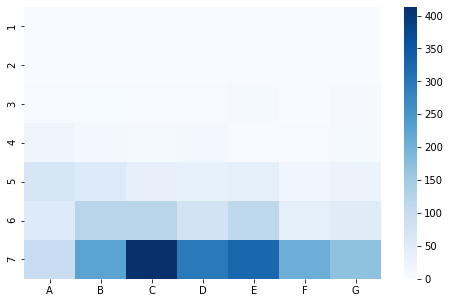

In [26]:
plotHeatmap(cor[cor['player'] == 'Fagner'], 7, show_labels=True)

Now if we plot cluster 4, the one gave to Jô

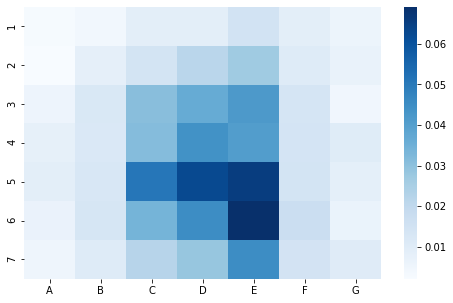

In [11]:
plotCluster(4)

and then plot Jô heatmap, on Athletico-PR x Corinthians,

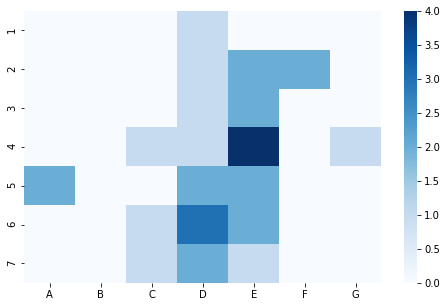

In [12]:
plotHeatmap(cor[cor['match'] == 'Athletico-PR x Corinthians'], 7, show_labels=True, player='Jô')

we see that all areas are way too different, and that's is ok, we hope that, sometimes, the player's touches on a match don't seems normal. One thing that can be happened on this case was: Jô's behavior on that match was so uncomum that it did not become a cluster, so he was classified as the closer cluster. But let's say we don't know Jô position, and based on this weird game we still can't afirm, so the simple way to know his position is seem which other clusters he was classified on other matches.

For this I group players rows and get frequency of cluster classifications.

In [14]:
freq_df = pd.crosstab([data['team'], data['player']], data['cluster'], normalize='index')
freq_df

cluster                        0         1         2         3         4   \
team        player                                                          
Corinthians B. Méndez    0.000000  0.000000  0.066667  0.000000  0.066667   
            Cássio       0.371429  0.000000  0.000000  0.000000  0.000000   
            D. Avelar    0.000000  0.000000  0.000000  0.000000  0.000000   
            Everaldo     0.000000  0.000000  0.000000  0.200000  0.000000   
            Fagner       0.000000  0.000000  0.781250  0.000000  0.000000   
...                           ...       ...       ...       ...       ...   
São Paulo   Reinaldo     0.000000  0.000000  0.000000  0.735294  0.000000   
            T. Tchê      0.000000  0.310345  0.034483  0.000000  0.137931   
            T. Volpi     0.473684  0.000000  0.000000  0.000000  0.000000   
            V. F. Bueno  0.000000  0.000000  0.000000  0.000000  0.095238   
            Welington    0.000000  0.000000  0.000000  1.000000  0.000000   

cluster                        5         6         7         8         9   \
team        player                                                          
Corinthians B. Méndez    0.000000  0.000000  0.000000  0.000000  0.533333   
            Cássio       0.628571  0.000000  0.000000  0.000000  0.000000   
            D. Avelar    0.000000  0.538462  0.000000  0.000000  0.000000   
            Everaldo     0.000000  0.000000  0.000000  0.200000  0.000000   
            Fagner       0.000000  0.000000  0.000000  0.000000  0.000000   
...                           ...       ...       ...       ...       ...   
São Paulo   Reinaldo     0.000000  0.000000  0.000000  0.264706  0.000000   
            T. Tchê      0.000000  0.000000  0.172414  0.000000  0.034483   
            T. Volpi     0.526316  0.000000  0.000000  0.000000  0.000000   
            V. F. Bueno  0.000000  0.000000  0.095238  0.238095  0.000000   
            Welington    0.000000  0.000000  0.000000  0.000000  0.000000   

cluster                   10      11        12        13        14   15  \
team        player                                                        
Corinthians B. Méndez    0.0  0.0000  0.000000  0.000000  0.000000  0.0   
            Cássio       0.0  0.0000  0.000000  0.000000  0.000000  0.0   
            D. Avelar    0.0  0.0000  0.000000  0.000000  0.000000  0.0   
            Everaldo     0.0  0.0000  0.000000  0.000000  0.000000  0.0   
            Fagner       0.0  0.0625  0.000000  0.000000  0.000000  0.0   
...                      ...     ...       ...       ...       ...  ...   
São Paulo   Reinaldo     0.0  0.0000  0.000000  0.000000  0.000000  0.0   
            T. Tchê      0.0  0.0000  0.000000  0.000000  0.034483  0.0   
            T. Volpi     0.0  0.0000  0.000000  0.000000  0.000000  0.0   
            V. F. Bueno  0.0  0.0000  0.047619  0.047619  0.428571  0.0   
            Welington    0.0  0.0000  0.000000  0.000000  0.000000  0.0   

cluster                        16        17        18        19  
team        player                                               
Corinthians B. Méndez    0.000000  0.000000  0.333333  0.000000  
            Cássio       0.000000  0.000000  0.000000  0.000000  
            D. Avelar    0.000000  0.461538  0.000000  0.000000  
            Everaldo     0.600000  0.000000  0.000000  0.000000  
            Fagner       0.000000  0.000000  0.000000  0.156250  
...                           ...       ...       ...       ...  
São Paulo   Reinaldo     0.000000  0.000000  0.000000  0.000000  
            T. Tchê      0.206897  0.034483  0.000000  0.034483  
            T. Volpi     0.000000  0.000000  0.000000  0.000000  
            V. F. Bueno  0.047619  0.000000  0.000000  0.000000  
            Welington    0.000000  0.000000  0.000000  0.000000  

[92 rows x 20 columns]

In [15]:
# Jô's clusters frequency
freq_df.loc[('Corinthians', 'Jô'),:].sort_values(ascending=False).head()

cluster
15    0.40
12    0.32
4     0.16
10    0.04
16    0.04
Name: (Corinthians, Jô), dtype: float64

As I said, cluster 4 was not even the most frequent to him. Let's visualize now his most frequent clusters.

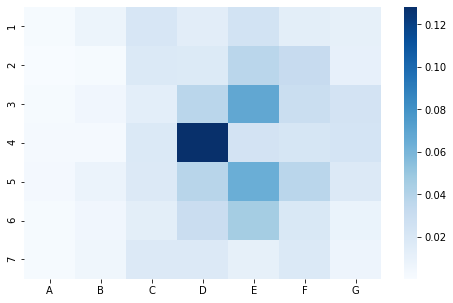

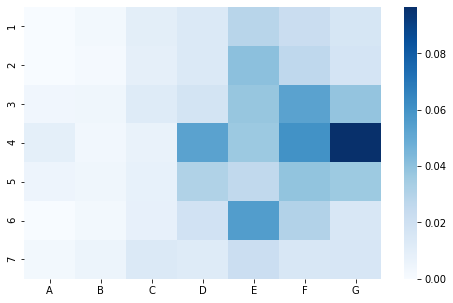

In [18]:
plotCluster(15), plotCluster(12);

I would name this clusters as "center forward when team is bad" an "center forward when team is good", respectively.

And is also easy to get which other players was classified as from the same cluster.

In [21]:
# Other players classified as "center forward when team is good"
data[data['cluster'] == 12][['team', 'player']].value_counts().head()

team         player 
Flamengo     Pedro      11
São Paulo    Brenner    11
Corinthians  Jô          8
Flamengo     Gabriel     7
São Paulo    Luciano     6
dtype: int64

A little bit more of cluster frequency for players.

In [22]:
# Corinthians' goalkeeper
freq_df.loc[('Corinthians', 'Cássio'),:].sort_values(ascending=False).head()

cluster
5     0.628571
0     0.371429
11    0.000000
18    0.000000
17    0.000000
Name: (Corinthians, Cássio), dtype: float64

In [23]:
# Flamengo' goalkeeper
freq_df.loc[('Flamengo', 'D. Alves'),:].sort_values(ascending=False).head()

cluster
0     0.5
5     0.5
11    0.0
18    0.0
17    0.0
Name: (Flamengo, D. Alves), dtype: float64

Cássio and D. Alves was classified sometimes as cluster 0 and sometimes as cluster 5, and this is weird because a goalkeeper don't change position, they are goalkeeper from the begin to the end of the match.

Let's visualize this clusters.

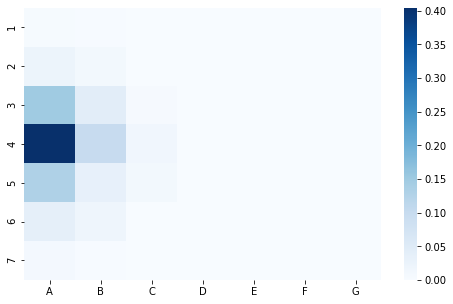

In [18]:
plotCluster(0)

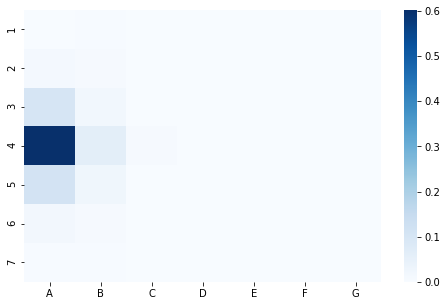

In [19]:
plotCluster(5)

And now we see that both clusters are really similar, what makes them different is that cluster 0 has more frequency at A3, A5 and B4 areas. So I can say that cluster 0 are those situations that the goalkeeper gets more out of goal area, or penalty area, and that is it.

And to finalize just getting information from other players.

In [24]:
freq_df.loc[('Flamengo', 'Gerson'),:].sort_values(ascending=False).head()

cluster
7     0.303030
4     0.242424
13    0.121212
10    0.090909
15    0.060606
Name: (Flamengo, Gerson), dtype: float64

In [25]:
freq_df.loc[('São Paulo', 'D. Alves'),:].sort_values(ascending=False).head()

cluster
4     0.500000
1     0.200000
16    0.100000
7     0.100000
2     0.033333
Name: (São Paulo, D. Alves), dtype: float64

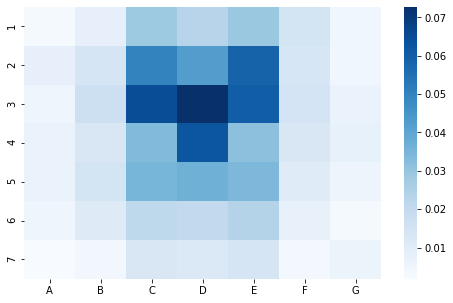

In [26]:
plotCluster(7)

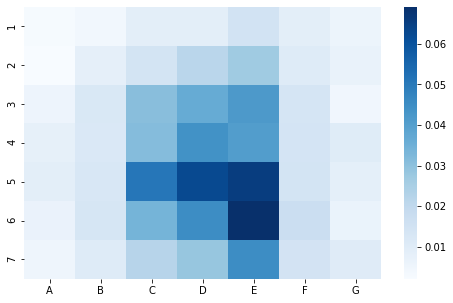

In [27]:
plotCluster(4)

In [28]:
# Players most classifieds as cluster 1
freq_df[1].sort_values(ascending=False).head()

team         player    
São Paulo    Luan          0.583333
Corinthians  G. Camacho    0.500000
São Paulo    R. Nestor     0.500000
Corinthians  Xavier        0.444444
Flamengo     João Gomes    0.400000
Name: 1, dtype: float64

In [30]:
# Players most classifieds as cluster 9
freq_df[9].sort_values(ascending=False).head()

team         player   
Flamengo     G. Noga      1.000000
São Paulo    D. Costa     0.722222
Corinthians  Marllon      0.666667
             Jemerson     0.571429
             B. Méndez    0.533333
Name: 9, dtype: float64